# Exploratory Data Analysis
## Introduction
In this notebook, we'll use the NMF models that were created in the notebook where topic modeling was performed, as well as the original DataFrames that contain the corpus, to try to find some more obvious patterns with EDA after identifying the hidden patterns with machines learning techniques. We are going to look at the following:

* **Number of Lines Spoken** - look at counts of lines for the top 25 characters
* **Explore Selected Topics in Movies Between Directors** - look at selected topics and how often they're the dominant topic in all the scenes for each director
* **Visualize Common Terms Between Directors** - create Word Clouds

In [1]:
# data manipulation
import pandas as pd
import numpy as np

# files
import pickle

# topic modeling
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# visualization
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

## Number of Lines Spoken

In [2]:
df_character = pd.read_pickle('df_char.pkl')

/Users/willnobles/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

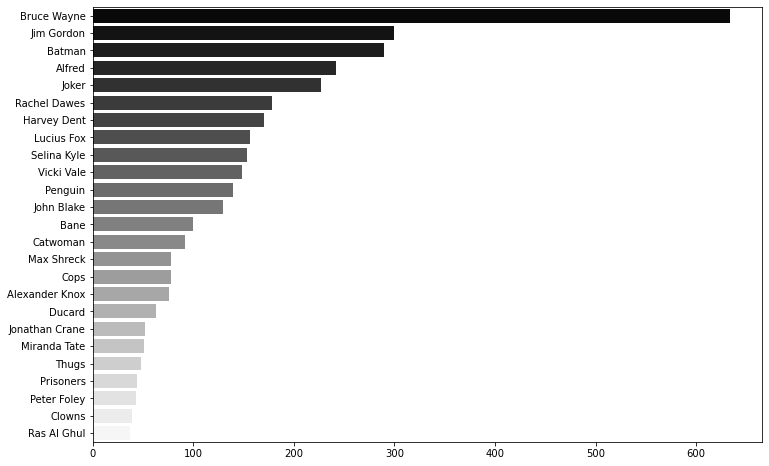

In [3]:
# look at lines spoken by the top 25 characters
counts = df_character.character.value_counts()[:25]

plt.figure(figsize=(12, 8))
sns.barplot(counts.values, counts.index, palette='gist_gray')

## Explore Selected Topics in Movies Between Directors
It would be interesting to select some of the topics from the NMF model and get counts of how often the dominant topic for each scene appears between Burton and Nolan films. The steps to accomplish this will be:
1. Create a DataFrame with just the selected topics.
2. Find the max value in each of the 825 rows.
3. Find the column (i.e. topic) that the max value belongs to.
4. Add back the column containing the topic information to the `doc_topic` DataFrame.
5. Get counts of the dominant topic for each director for each of the selected topic.
6. Get the percentages that the topic occurs in the director's films by dividing the counts by the total number of movie scenes for that director.

In [4]:
# read in relevant dataframes

df = pd.read_pickle('df.pkl')
df_nmf = pd.read_pickle('df_nmf.pkl')
df_doc_topic = pd.read_pickle('df_doc_topic.pkl')

In [5]:
# add columns to the document-topic matrix

df_doc_topic['dialogue_lemmatized'] = df['dialogue_lemmatized'].values
df_doc_topic['movie'] = df['movie'].values
df_doc_topic['director'] = df['director'].values

df_doc_topic.sort_values(by=0, ascending=False)

,0,1,2,3,4,5,6,7,8,9,dialogue_lemmatized,movie,director
25,0.119177,0.000000,0.000000,0.000000,0.000304,0.000000,0.000887,0.000000,0.000000,0.075965,bruce im late but ive a proposition ill make u...,Batman,Tim Burton
626,0.114091,0.000000,0.001638,0.000000,0.000000,0.000000,0.091228,0.000000,0.007572,0.000000,harvey dent day may not be our oldest public h...,The Dark Knight Rises,Christopher Nolan
425,0.109314,0.001151,0.000000,0.000000,0.010778,0.000066,0.003670,0.213883,0.000202,0.000000,you promised safe clean money launder with the...,The Dark Knight,Christopher Nolan
632,0.108832,0.000000,0.000000,0.011819,0.000000,0.002168,0.000151,0.006028,0.010181,0.002764,you havent been down here in a long time just ...,The Dark Knight Rises,Christopher Nolan
630,0.107746,0.000000,0.000000,0.000000,0.002114,0.018448,0.004437,0.000000,0.000000,0.028964,can i have a ride you read my mind miss tate w...,The Dark Knight Rises,Christopher Nolan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,0.000000,0.001454,0.000000,0.000000,0.000000,0.000000,0.000000,0.247914,0.051922,0.000000,rest assured your money is safe he is already ...,The Dark Knight,Christopher Nolan
702,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,he behind you who me just a little further,The Dark Knight Rises,Christopher Nolan
427,0.000000,0.000000,0.000450,0.000000,0.000000,0.000000,0.000000,0.185878,0.000000,0.000000,for obvious reason i couldnt wait for your per...,The Dark Knight,Christopher Nolan
426,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,i already have,The Dark Knight,Christopher Nolan


In [6]:
# create a dataframe with selected topics
df_selected_topics = df_doc_topic[[2, 3, 5, 6, 9]]

# get max value in each of 825 rows (i.e. all scenes)
dominant_topic = df_selected_topics.max(axis=1)

# get column of max value for each row
dominant_column = df_selected_topics.idxmax(axis=1)

# add as columns to dataframe
df_selected_topics['dominant_topic'] = dominant_topic
df_selected_topics['dominant_topic_column'] = dominant_column

df_selected_topics

<ipython-input-6-92994c4e00cd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_topics['dominant_topic'] = dominant_topic
<ipython-input-6-92994c4e00cd>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_topics['dominant_topic_column'] = dominant_column


,2,3,5,6,9,dominant_topic,dominant_topic_column
0,0.133992,0.000000,0.000000,0.003735,0.000000,0.133992,2
1,0.000000,0.000000,0.000000,0.002163,0.000000,0.002163,6
2,0.000000,0.000000,0.003908,0.000000,0.000000,0.003908,5
3,0.000000,0.000000,0.092610,0.000000,0.000000,0.092610,5
4,0.014296,0.014837,0.000000,0.007281,0.001799,0.014837,3
...,...,...,...,...,...,...,...
820,0.000000,0.000000,0.134341,0.000000,0.000000,0.134341,5
821,0.000000,0.000000,0.000000,0.000000,0.000687,0.000687,9
822,0.000000,0.000000,0.000000,0.000000,0.140773,0.140773,9
823,0.000000,0.007807,0.000000,0.000562,0.000000,0.007807,3


In [7]:
# add dominant topic column to the original dataframe
df_doc_topic['dominant_topic'] = dominant_column

# look at total number of scenes for each director
df_doc_topic.groupby('director')['director'].value_counts()

director           director         
Christopher Nolan  Christopher Nolan    604
Tim Burton         Tim Burton           221
Name: director, dtype: int64

In [8]:
# get counts of total number of scenes for each dominant topic
topic_counts = df_doc_topic.groupby('director')['dominant_topic'].value_counts()

# create a dataframe and format columns
df_topic_counts = topic_counts.to_frame().reset_index(level='director')
df_topic_counts.index.names = ['topic']
df_topic_counts.rename(columns={"dominant_topic":"topic_count"}, inplace=True)
df_topic_counts.reset_index(inplace=True)

# create a column for the number of scenes per topic
df_topic_counts['topic_percentage'] = df_topic_counts[df_topic_counts.director == 'Tim Burton'].topic_count / 221
df_topic_counts['topic_percentage_n'] = df_topic_counts[df_topic_counts.director == 'Christopher Nolan'].topic_count / 604

# add Nolan values to Burton column
for i in range(0, 5):
    df_topic_counts.topic_percentage.iloc[i] = df_topic_counts.topic_percentage_n.iloc[i]

df_topic_counts.drop(columns='topic_percentage_n', inplace=True)
df_topic_counts.sort_values(by='topic', inplace=True)
df_topic_counts

/Users/willnobles/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,topic,director,topic_count,topic_percentage
1,2,Christopher Nolan,154,0.254967
6,2,Tim Burton,51,0.230769
4,3,Christopher Nolan,61,0.100993
9,3,Tim Burton,24,0.108597
0,5,Christopher Nolan,156,0.258278
5,5,Tim Burton,59,0.266968
2,6,Christopher Nolan,133,0.220199
7,6,Tim Burton,51,0.230769
3,9,Christopher Nolan,100,0.165563
8,9,Tim Burton,36,0.162896


[Text(0, 0.5, '')]

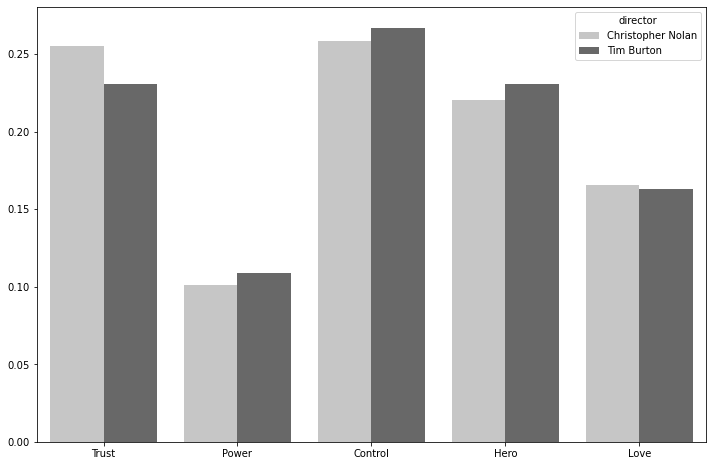

In [9]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x="topic", y="topic_percentage", hue="director", data=df_topic_counts, palette="Greys")
ax.set_xticklabels(['Trust','Power','Control','Hero','Love'])
ax.set(xlabel=None)
ax.set(ylabel=None)

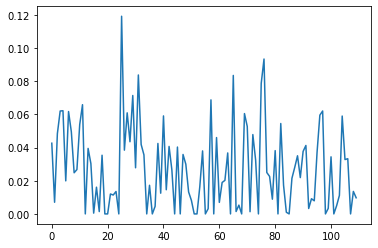

In [10]:
# look at topic 0 probability over all scenes in Batman

batman_topics = df_doc_topic[df_doc_topic['movie'] == 'Batman']
plt.plot(batman_topics.index, batman_topics[0])
plt.show()

## Visualize Common Terms Between Directors
Let's create Word Clouds to explore the terms used most frequently in the Batman movies directed by Tim Burton and Christopher Nolan.

In [11]:
# read in the dataframes

df_burton = pd.read_pickle('df_burton.pkl')
df_nolan = pd.read_pickle('df_nolan.pkl')

df_nmf_burton = pd.read_pickle('df_nmf_burton.pkl')
df_nmf_nolan = pd.read_pickle('df_nmf_nolan.pkl')

In [12]:
# re-add stop words

add_stop_words = ['im', 'know', 'dont', 'think', 'thought', 'got', 'ready', 'sir', 'hell', 'ill',
                  'oh', 'tell', 'youre', 'going', 'want', 'like', 'yes', 'just', 'hes', 'shes',
                  'took', 'theyre', 'wanna', 'looks', 'need', 'does', 'yeah', 'thats', 'come',
                  'gonna', 'gon', 'whered', 'didnt', 'did', 'coming', 'told', 'aint', 'little',
                  'okay', 'youve', 'trying', 'lets', 'ive', 'hed', 'mr', 'doing', 'let', 'came',
                  'whats', 'sure', 'stay', 'theres', 'doing', 'said', 'knows', 'ah', 'gotta', 'hey',
                  'weve', 'theyve', 'wheres', 'em', 'whatre', 'batman', 'gotham', 'dent', 'rachel',
                  'harvey', 'wayne', 'bruce', 'alfred', 'youll', 'yous', 'yup', 'ac', 'shouldnt',
                  'yknow', 'youd', 'youits', 'say', 'hi', 'ya', 'lot', 'gordon', 'isnt', 'wa']

stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

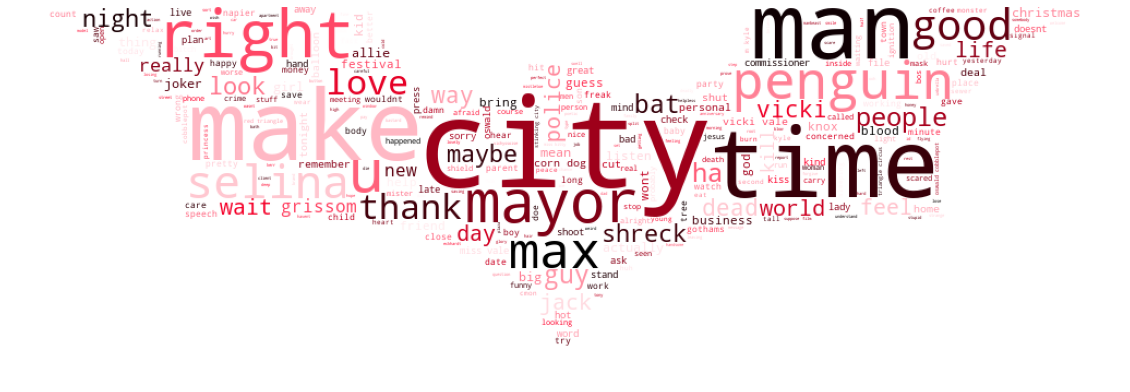

In [13]:
# make word cloud for Burton movies

from PIL import Image

burton_mask = np.array(Image.open("batman-images/dk.png"))

def similar_color_func_red(word=None, font_size=None,
                       position=None, orientation=None,
                       font_path=None, random_state=None):
    h = 350 # 0 - 360
    s = 100 # 0 - 100
    l = random_state.randint(0, 100) # 0 - 100
    return "hsl({}, {}%, {}%)".format(h, s, l)

burton_cloud = WordCloud(stopwords=stop_words, background_color="white", max_words=1000, mask=burton_mask, max_font_size=256,
               random_state=42, width=burton_mask.shape[1],
               height=burton_mask.shape[0], color_func=similar_color_func_red).generate(" ".join(df_burton.dialogue_lemmatized))

plt.figure(figsize=[20,10])
plt.imshow(burton_cloud)
plt.axis('off')
plt.show()

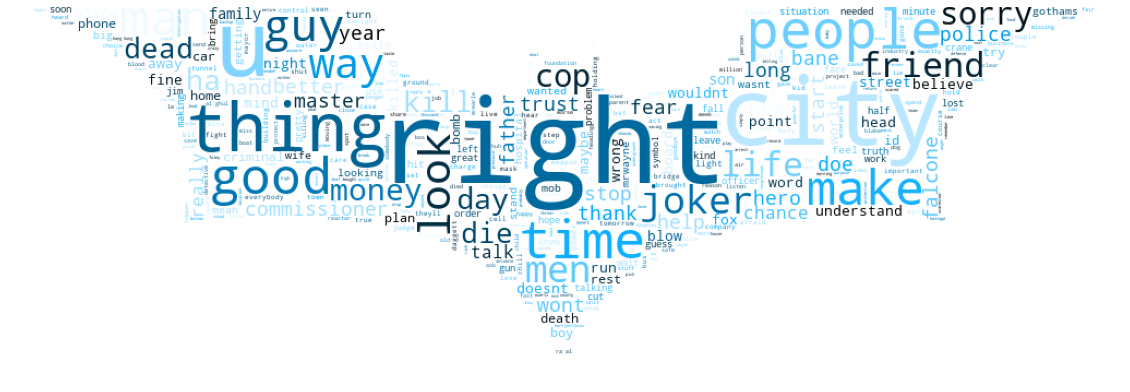

In [14]:
# make word clouds for Nolan movies

nolan_mask = np.array(Image.open("batman-images/dk.png"))

def similar_color_func_blue(word=None, font_size=None,
                       position=None, orientation=None,
                       font_path=None, random_state=None):
    h = 200 # 0 - 360
    s = 100 # 0 - 100
    l = random_state.randint(0, 100) # 0 - 100
    return "hsl({}, {}%, {}%)".format(h, s, l)

nolan_cloud = WordCloud(stopwords=stop_words, background_color="white", max_words=1000, mask=nolan_mask, max_font_size=256,
               random_state=42, width=nolan_mask.shape[1],
               height=nolan_mask.shape[0], color_func=similar_color_func_blue).generate(" ".join(df_nolan.dialogue_lemmatized))

plt.figure(figsize=[20,10])
plt.imshow(nolan_cloud)
plt.axis('off')
plt.show()